In [3]:
import pandas as pd

# Read the CSV file with whitespace delimiter
df = pd.read_csv('data/output.csv', delim_whitespace=True, header=None, names=['operation', 'ds', 'action', 'lba'])

# Filter out 'N' and 'FWFS' data
df = df[~df['operation'].isin(['N', 'FWFS','RM', 'RA', 'R'])]

# Replace 'W', 'WM', 'WS' with 'write' and 'RM', 'RA', 'R' with 'read'
df['operation'] = df['operation'].replace({'W': 'write', 'WM': 'write', 'WS': 'write', 'RM': 'read', 'RA': 'read', 'R': 'read'})

# Save the modified DataFrame to a new CSV file
df.to_csv('data/modified_output.csv', index=False)

# Print the modified DataFrame
df

/tmp/ipykernel_2239307/2762000108.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('data/output.csv', delim_whitespace=True, header=None, names=['operation', 'ds', 'action', 'lba'])


,operation,ds,action,lba
0,write,0.000000,A,1968643760
1,write,0.115700,Q,1968643760
2,write,0.120020,G,1968643760
4,write,0.182800,A,1969054600
5,write,0.186770,Q,1969054600
...,...,...,...,...
530733,write,2967.410554,I,7402123352
530734,write,2967.410685,D,5634531520
530735,write,2967.410784,D,7402123352
530736,write,2967.412064,C,5634531520


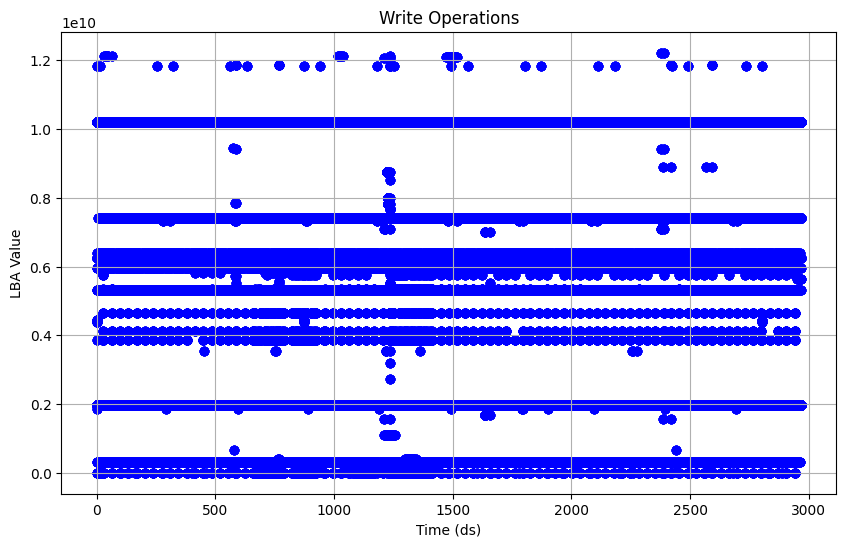

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Save the modified DataFrame to a new CSV file
df.to_csv('data/modified_output.csv', index=False)

# Separate the data for 'write' and 'read' operations
write_df = df[df['operation'] == 'write']
read_df = df[df['operation'] == 'read']

# Plot 'write' operations
plt.figure(figsize=(10, 6))
plt.scatter(write_df['ds'], write_df['lba'], marker='o', linestyle='-', color='b')
plt.xlabel('Time (ds)')
plt.ylabel('LBA Value')
plt.title('Write Operations')
plt.grid(True)
plt.show()

# Plot 'read' operations
# plt.figure(figsize=(10, 6))
# plt.scatter(read_df['ds'], read_df['lba'], marker='o', linestyle='-', color='r')
# plt.xlabel('Time (ds)')
# plt.ylabel('LBA Value')
# plt.title('Read Operations')
# plt.grid(True)
# plt.show()

In [ ]:
#read MSR data
import pandas as pd

# Define the path to your file
file_path = "data/msr_trace/src1_1.revised"

# Assuming the file is space-separated (based on the sample data you showed)
df = pd.read_csv(file_path, sep=' ', header=None)
df.columns = ['timestamp', 'request_type', 'LBA', 'request_size', 'access_type', 'arrival_time', 'service_time', 'idle_time']

# Remove duplicate rows based on the 'timestamp' column
df = df.drop_duplicates(subset='timestamp')

# Drop the specified columns
columns_to_hide = ['request_size', 'access_type', 'arrival_time', 'service_time', 'idle_time']
df_reduced = df.drop(columns=columns_to_hide)

print(df_reduced.head())

num_rows = len(df)
print(f"Total number of rows in the dataset: {num_rows}")




   timestamp request_type       LBA
0   0.000004           WS   1630184
1   0.000087           WS  49829432
2   0.000143           WS   1552992
3   0.010260           WS   1553008
4   0.010328           WS   1540152
Total number of rows in the dataset: 11111429


/tmp/ipykernel_806777/3288698052.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


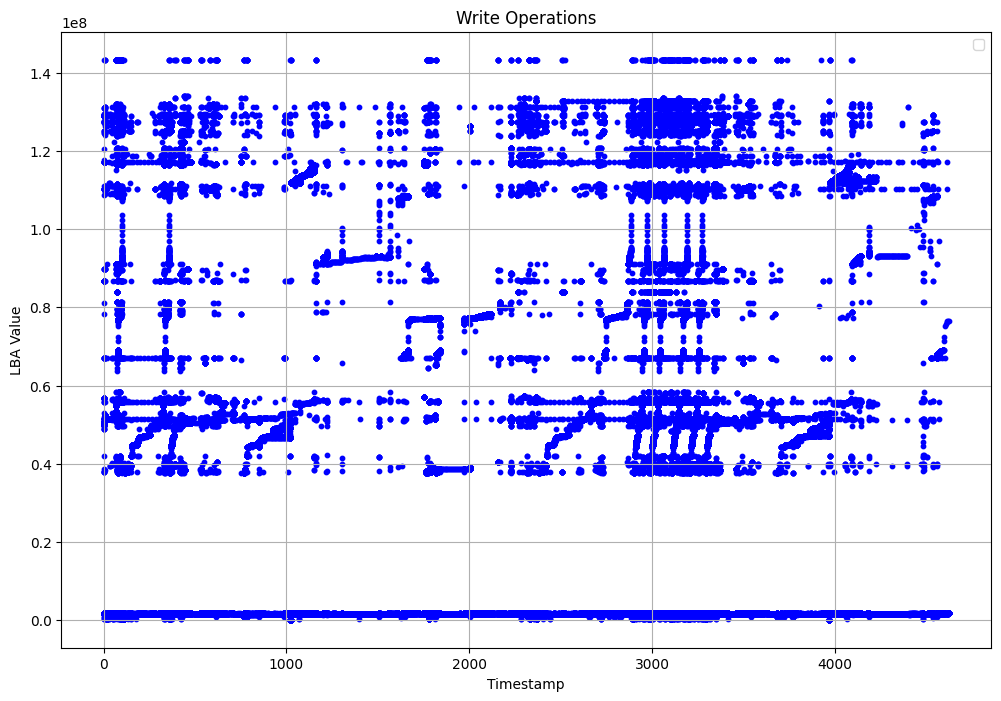

/tmp/ipykernel_806777/3288698052.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/home/houjason/miniforge3/envs/cacheFL/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


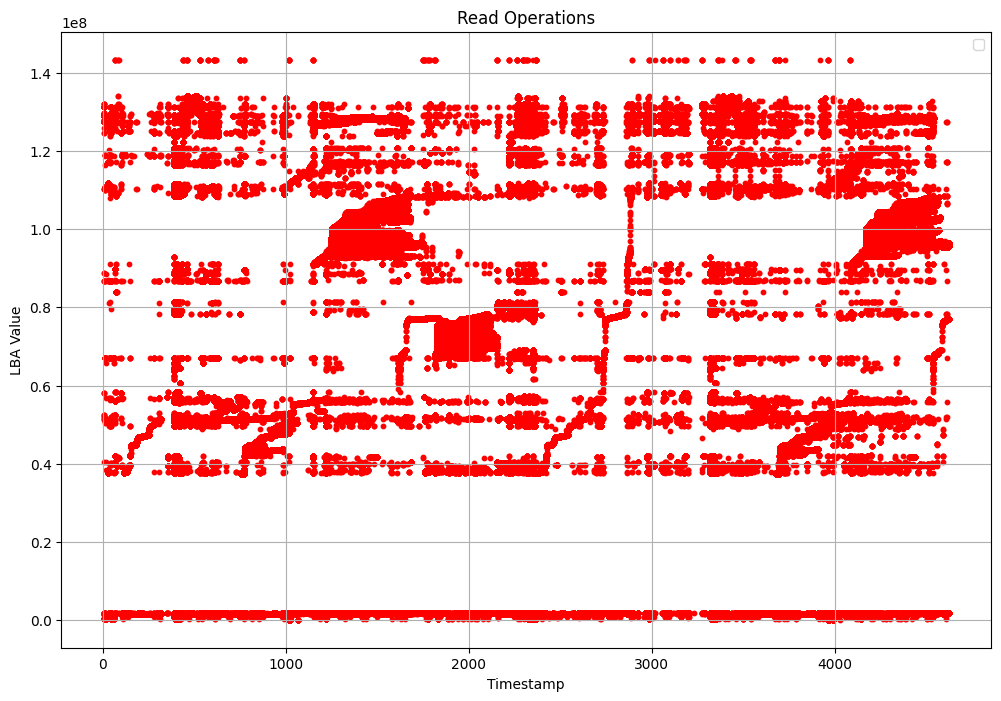

In [ ]:
#read MSR data and plot

import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your file
file_path = "data/msr_trace/src1_1.revised"

# Assuming the file is space-separated (based on the sample data you showed)
df = pd.read_csv(file_path, sep=' ', header=None)
df.columns = ['timestamp', 'request_type', 'LBA', 'request_size', 'access_type', 'arrival_time', 'service_time', 'idle_time']

# Remove duplicate rows based on the 'timestamp' column
df = df.drop_duplicates(subset='timestamp')

# Drop the specified columns
columns_to_hide = ['request_size', 'access_type', 'arrival_time', 'service_time', 'idle_time']
df_reduced = df.drop(columns=columns_to_hide)

# Plotting WS (Write Sequential) requests in a separate plot
plt.figure(figsize=(12, 8))
ws_subset = df_reduced[df_reduced['request_type'] == 'WS']
plt.scatter(ws_subset['timestamp'], ws_subset['LBA'], color='blue', s=10)

# Adding labels and title to the plot for WS
plt.xlabel('Timestamp')
plt.ylabel('LBA Value')
plt.title('Write Operations')
plt.legend()
plt.grid(True)
plt.show()

# Plotting RS (Read Sequential) requests in a separate plot
plt.figure(figsize=(12, 8))
rs_subset = df_reduced[df_reduced['request_type'] == 'RS']
plt.scatter(rs_subset['timestamp'], rs_subset['LBA'], color='red', s=10)

# Adding labels and title to the plot for RS
plt.xlabel('Timestamp')
plt.ylabel('LBA Value')
plt.title('Read Operations')
plt.legend()
plt.grid(True)
plt.show()


700000
Epoch 1/20


/home/houjason/miniforge3/envs/cacheFL/lib/python3.9/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15006/15006 ━━━━━━━━━━━━━━━━━━━━ 160s 11ms/step - loss: 0.0280 - mae: 0.0992 - val_loss: 0.0835 - val_mae: 0.2711
Epoch 2/20
15006/15006 ━━━━━━━━━━━━━━━━━━━━ 160s 11ms/step - loss: 0.0233 - mae: 0.0833 - val_loss: 0.0765 - val_mae: 0.2540
Epoch 3/20
15006/15006 ━━━━━━━━━━━━━━━━━━━━ 161s 11ms/step - loss: 0.0232 - mae: 0.0819 - val_loss: 0.0725 - val_mae: 0.2413
Epoch 4/20
15006/15006 ━━━━━━━━━━━━━━━━━━━━ 160s 11ms/step - loss: 0.0227 - mae: 0.0802 - val_loss: 0.0731 - val_mae: 0.2442
Epoch 5/20
15006/15006 ━━━━━━━━━━━━━━━━━━━━ 159s 11ms/step - loss: 0.0226 - mae: 0.0797 - val_loss: 0.0674 - val_mae: 0.2248
Epoch 6/20
15006/15006 ━━━━━━━━━━━━━━━━━━━━ 159s 11ms/step - loss: 0.0227 - mae: 0.0793 - val_loss: 0.0687 - val_mae: 0.2311
Epoch 7/20
15006/15006 ━━━━━━━━━━━━━━━━━━━━ 159s 11ms/step - loss: 0.0228 - mae: 0.0795 - val_loss: 0.0713 - val_mae: 0.2390
Epoch 8/20
15006/15006 ━━━━━━━━━━━━━━━━━━━━ 159s 11ms/step - loss: 0.0225 - mae: 0.0786 - val_loss: 0.0697 - val_mae: 0.2330
Epoch 9/20


Test Loss: 0.06286900490522385, Test MAE: 0.20444756746292114


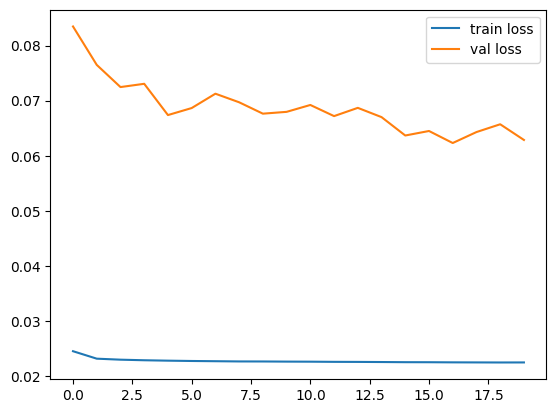

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, TimeDistributed, Dense, Dropout, Reshape

# Step 1: Load and preprocess the data
# Define the path to your file
file_path = "data/msr_trace/src1_1.revised"

# Load data
df = pd.read_csv(file_path, sep=' ', header=None, nrows=700000)
print(len(df))
df.columns = ['timestamp', 'request_type', 'LBA', 'request_size', 'access_type', 'arrival_time', 'service_time', 'idle_time']

# Filter data to use only necessary columns and `request_type == 'WS'`
df = df[df['request_type'] == 'RS']
df = df[['timestamp', 'request_type', 'LBA']]

# Normalize 'LBA' for better model performance
df['LBA'] = (df['LBA'] - df['LBA'].min()) / (df['LBA'].max() - df['LBA'].min())

# Convert the 'LBA' column into sequences for time-series input
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        sequences.append(seq)
    return np.array(sequences)

sequence_length = 10  # Define the length of sequences
sequences = create_sequences(df['LBA'].values, sequence_length)

# Split sequences into train and test sets
train_size = int(len(sequences) * 0.8)
train_sequences = sequences[:train_size]
test_sequences = sequences[train_size:]

# Separate inputs (X) and outputs (y)
X_train = train_sequences[:, :-1]
y_train = train_sequences[:, -1]
X_test = test_sequences[:, :-1]
y_test = test_sequences[:, -1]

# Reshape inputs for CNN-LSTM (add channels and steps dimensions)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1))  # Add channel dimension
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))

# Step 2: Define the CNN-LSTM Model
model = Sequential()

# CNN layers
model.add(TimeDistributed(Conv2D(32, (1, 1), activation='relu', padding='same'), input_shape=(X_train.shape[1], 1, 1, 1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
model.add(TimeDistributed(Flatten()))

# LSTM layers
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu'))

# Fully connected layers
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Single output for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 3: Train the Model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Step 4: Evaluate the Model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Save the model
model.save("cnn_lstm_model_simple.h5")

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


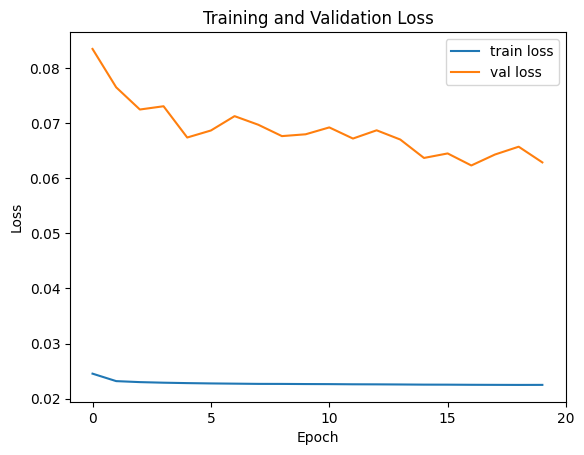

In [30]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')

# Set x-axis ticks at 0, 5, 10, 15, 20
epochs = range(1, len(history.history['loss']) + 1)  # Epochs as integers starting from 1
plt.xticks(range(0, len(epochs) + 1, 5))  # Ticks every 5 epochs

# Add labels and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
